<a href="https://colab.research.google.com/github/kevaljoshi3131/Face_Recognition2/blob/master/Face_detection_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import sys 
import os
project_folder = "/content/drive/My Drive/Face_Recognition/"
sys.path.append(project_folder)
os.chdir(project_folder)
print("current Wrokiing directory sucessfully changed to ",os.getcwd())

current Wrokiing directory sucessfully changed to  /content/drive/My Drive/Face_Recognition


In [2]:
!git clean -f -d
!git init
!git config --global user.name = "kevaljoshi3131"
!git config --global user.email = "joshikeval3131@gmail.com"


Removing .config/
Removing sample_data/
Reinitialized existing Git repository in /content/.git/


#Import section 



In [0]:
import argparse
import sys
import os
import cv2 
import matplotlib.pyplot as plt
import numpy
import numpy as np 

#This is a local py file which contains useful functions
from utils import *



#Display test image. 
it display image from the given path and also the image passed as an array. one by one. 
update img_path variable to display the selected image

In [0]:
def display_image(images):
    """.. Function to display images.
        Input--> it can be array of image path or image array.
        Output--> display images passed. """
        
    if len(images)== 0 :
        print("No image is there to display.")
    else:
        if isinstance(images[0],str):
            
            for path in images:
                imgarr = cv2.imread(path,cv2.IMREAD_UNCHANGED)
                plt.figure()
                plt.imshow(imgarr[:,:,::-1])

        elif isinstance(images[0],np.ndarray):

            for image in images:
                plt.figure()
                plt.imshow(image)




#forward pass and non max suppression


In [0]:
#This function will detect the faces in the given image and returns an image with boxes drawn by yolo algo .
#This also returns the crop image of detected faces.
#utils import is necessary 


def YoloFaceDetect(img_path,conf_path,weights_path):
    """input--> image_path, yolov3-face.cfg file path, darknet yolo v3 pretrained weightes file path.
        --------------------------------------------------------------------------------------------
        output--> img_with_box, cropedfaces list ."""

    #read image and convert it to 4D blob
    img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    blob = cv2.dnn.blobFromImage(img, 1 / 255, (IMG_WIDTH, IMG_HEIGHT), [0, 0, 0], 1, crop=False)

    #setting up model and making forward pass 
    net = cv2.dnn.readNetFromDarknet(conf_path, weights_path)
    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
    net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

    net.setInput(blob)
    outs = net.forward(get_outputs_names(net))
    #post procees the detected output and also performs non_max suppression
    faces = post_process(img, outs, CONF_THRESHOLD, NMS_THRESHOLD)
    print(faces)
    print('[i] ==> # detected faces: {}'.format(len(faces)))
    print('#' * 60)

    #cropfaces
    cropfaces = []
    for face in faces:  
        x1,y1,x2,y2 = refined_box(*face)
        cropfaces.append(img[y1+4:y2-4 ,x1+4:x2-4,:][:,:,::-1])
    
    return img[:,:,::-1],cropfaces


In [57]:
conf_path = "/content/drive/My Drive/Face_Recognition/cfg/yolov3-face.cfg"
weights_path = "/content/drive/My Drive/Face_Recognition/model-weights/yolov3-wider_16000.weights"
img_path = "/content/drive/My Drive/Face_Recognition/samples/rahul.JPG"

image,cropedfaces = YoloFaceDetect(img_path,conf_path,weights_path)



[[3311, 855, 1084, 1458]]
[i] ==> # detected faces: 1
############################################################


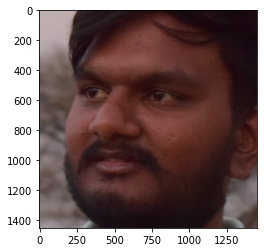

In [58]:
display_image(cropedfaces)